# Caso de Estudio 1. Sistema de tres variables de estado


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definimos Parámetros de Motor
Laa = 5e-3    # Inductance (H)
J = 0.004     # Moment of inertia (kg*m^2)
Ra = 0.2      # Resistance (ohms)
Bm = 0.005    # Damping coefficient (N*m*s/rad)
Ki = 6.5e-5   # Torque constant (N*m/A)
Km = 0.055    # Back emf constant (V*s/rad)

In [7]:
# Definimos las matrices del sistema
A = np.array([
    [-Ra / Laa, -Km / Laa, 0],
    [Ki / J, -Bm / J, 0],
    [0, 1, 0]
])

B = np.array([
    [1 / Laa, 0],
    [0, -1 / J],
    [0, 0]
])

C = np.array([[0, 0, 1]])

A, B, C


(array([[-4.000e+01, -1.100e+01,  0.000e+00],
        [ 1.625e-02, -1.250e+00,  0.000e+00],
        [ 0.000e+00,  1.000e+00,  0.000e+00]]),
 array([[ 200.,    0.],
        [   0., -250.],
        [   0.,    0.]]),
 array([[0, 0, 1]]))

## LQR

In [8]:
# Matriz Q
Q = np.diag([0.1, 0.1, 0.1, 100000])

print(Q)

[[1.e-01 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-01 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-01 0.e+00]
 [0.e+00 0.e+00 0.e+00 1.e+05]]


In [9]:
# Matriz R
R = np.array([[2000]])

# Ampliamos la matriz A para agregar un integrador
A_aug = np.block([
    [A, np.zeros((3, 1))],
    [-C, np.array([[0]])]
])

print("R:", R)
print("Aamp:", A_aug)

R: [[2000]]
Aamp: [[-4.000e+01 -1.100e+01  0.000e+00  0.000e+00]
 [ 1.625e-02 -1.250e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  1.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00 -1.000e+00  0.000e+00]]


In [10]:

# Ampliamos la matriz B
B_aug = np.vstack([B[:, [0]], [0]])

print("Bamp:", B_aug)

Bamp: [[200.]
 [  0.]
 [  0.]
 [  0.]]


In [11]:
C_aug = np.hstack((C, [[0]]))

In [12]:
# Construcción del Hamiltoniano para el cálculo de la solución de Riccati
H_upper = np.hstack((A_aug, -B_aug @ np.linalg.inv(R) @ B_aug.T))
H_lower = np.hstack((-Q, -A_aug.T))
H = np.vstack((H_upper, H_lower))
print("Hamilitoniano: ",H)

Hamilitoniano:  [[-4.000e+01 -1.100e+01  0.000e+00  0.000e+00 -2.000e+01  0.000e+00
   0.000e+00  0.000e+00]
 [ 1.625e-02 -1.250e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00]
 [ 0.000e+00  1.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00 -1.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00]
 [-1.000e-01 -0.000e+00 -0.000e+00 -0.000e+00  4.000e+01 -1.625e-02
  -0.000e+00 -0.000e+00]
 [-0.000e+00 -1.000e-01 -0.000e+00 -0.000e+00  1.100e+01  1.250e+00
  -1.000e+00 -0.000e+00]
 [-0.000e+00 -0.000e+00 -1.000e-01 -0.000e+00 -0.000e+00 -0.000e+00
  -0.000e+00  1.000e+00]
 [-0.000e+00 -0.000e+00 -0.000e+00 -1.000e+05 -0.000e+00 -0.000e+00
  -0.000e+00 -0.000e+00]]


In [13]:
# Calcular valores y vectores propios del Hamiltoniano
eigvals, eigvecs = np.linalg.eig(H)
eigvecs = eigvecs[:, np.real(eigvals) < 0]  # Seleccionar solo valores propios negativos
print("Eigenvalues: ",eigvals)
print("Eigenvectors: ",eigvecs)

Eigenvalues:  [-40.0203818 +0.j          40.0203818 +0.j
  -1.29986953+0.j          -0.43815013+0.49978542j
  -0.43815013-0.49978542j   0.43815013+0.49978542j
   0.43815013-0.49978542j   1.29986953+0.j        ]
Eigenvectors:  [[-9.99998861e-01+0.00000000e+00j -5.19633376e-05+0.00000000e+00j
  -8.26477034e-05-2.46039664e-05j -8.26477034e-05+2.46039664e-05j]
 [ 4.19133904e-04+0.00000000e+00j  1.69322693e-05+0.00000000e+00j
  -1.41949234e-06+3.81384699e-07j -1.41949234e-06-3.81384699e-07j]
 [-1.04730111e-05+0.00000000e+00j -1.30261299e-05+0.00000000e+00j
   1.83936849e-06+1.22767246e-06j  1.83936849e-06-1.22767246e-06j]
 [-2.61691935e-07+0.00000000e+00j -1.00211057e-05+0.00000000e+00j
   4.35409079e-07+3.29860353e-06j  4.35409079e-07-3.29860353e-06j]
 [-1.24961227e-03+0.00000000e+00j  9.12366491e-05+0.00000000e+00j
   1.63650687e-04+5.05244655e-05j  1.63650687e-04-5.05244655e-05j]
 [ 3.34476219e-04+0.00000000e+00j  2.32200495e-01+0.00000000e+00j
   4.09307521e-01+1.20848375e-01j  4.093075

In [14]:
# Separar matrices para resolver Riccati
X1 = eigvecs[:4, :]
X2 = eigvecs[4:, :]
P = np.real(X2 @ np.linalg.inv(X1))
print("P", P)

P [[ 4.73275792e-02  1.14800133e+02  1.96430561e+02 -7.07106781e+01]
 [ 1.14800133e+02  2.86046756e+05  4.90611902e+05 -1.78175903e+05]
 [ 1.96430561e+02  4.90611902e+05  8.88254801e+05 -3.85849602e+05]
 [-7.07106781e+01 -1.78175903e+05 -3.85849602e+05  2.77794763e+05]]


In [15]:
# Ganancia del controlador LQR
K_lqr = np.linalg.inv(R) @ B_aug.T @ P
K_feedback = K_lqr[0, :-1]
K_integral = K_lqr[0, -1]
print("K_lqr", K_lqr)
print("K_feedback", K_feedback)
print("K_integral", K_integral)

K_lqr [[ 4.73275792e-03  1.14800133e+01  1.96430561e+01 -7.07106781e+00]]
K_feedback [4.73275792e-03 1.14800133e+01 1.96430561e+01]
K_integral -7.07106781186877


In [16]:
# Polos del sistema lazo cerrado lqr
poles,_ = np.linalg.eig(A_aug-B_aug*K_lqr)
poles

array([-40.0203818 +0.j        ,  -1.29986953+0.j        ,
        -0.43815013+0.49978542j,  -0.43815013-0.49978542j])

In [17]:
# determinamos el tiempo del euler
# Polo mas rapido
lambda_val = np.min(poles)
lambda_val

(-40.02038179564798+0j)

In [18]:
# tiempo de euler
tr = np.log(0.95)/lambda_val
tr

(0.0012816792865561436-0j)

In [19]:
# Definimos el paso de simulación
h = 1e-4
simTime = 50  # Tiempo de Simulación

# Creamos el vector de tiempo
t = np.arange(0, simTime, h)

print(t)

[0.00000e+00 1.00000e-04 2.00000e-04 ... 4.99997e+01 4.99998e+01
 4.99999e+01]


In [20]:
# Generamos la referencia q cambia cada 5 segundos
reference = (np.pi / 2) * np.sign(np.sin(2 * np.pi * (1 / 10) * t))

# Printing or using the reference as needed
print(reference)

[ 0.          1.57079633  1.57079633 ... -1.57079633 -1.57079633
 -1.57079633]


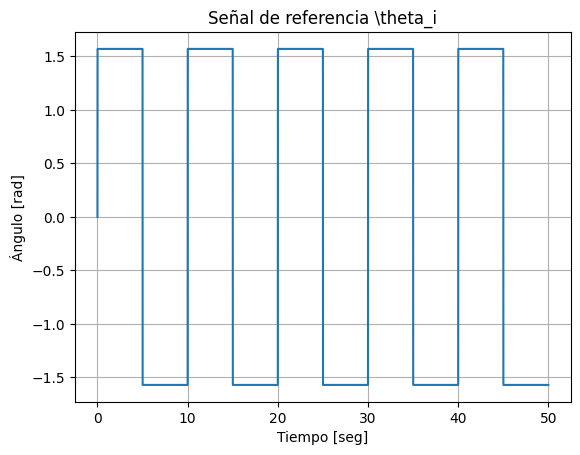

In [21]:
# Graficamos la referencia
plt.plot(t, reference, linewidth=1.5)
plt.xlabel('Tiempo [seg]')
plt.ylabel('Ángulo [rad]')
plt.title('Señal de referencia \\theta_i')
plt.grid(True)
plt.show()

In [22]:
# Generamos
torque = ((1.15e-3) / 2) * np.sign(np.sin(2 * np.pi * (1 / 10) * t)) + ((1.15e-3) / 2)
# Add Gaussian noise with mean 0 and standard deviation 0.0001
noise = np.random.normal(0, 0.000002, size=torque.shape)
torque = torque + noise
# Printing or using the torque as needed
print(torque)

[ 5.73989032e-04  1.15054218e-03  1.15102704e-03 ...  3.81096126e-07
  3.15733659e-06 -7.85982703e-07]


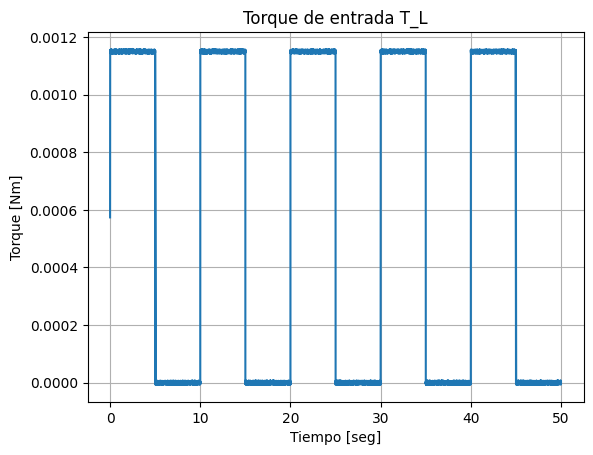

In [23]:
# Plotting the torque signal
plt.plot(t, torque, linewidth=1.5)
plt.xlabel('Tiempo [seg]')
plt.ylabel('Torque [Nm]')
plt.title('Torque de entrada T_L')
plt.grid(True)
plt.show()

In [24]:
# Inicializar variables
ia = np.zeros(len(t))
theta = np.zeros(len(t))
omega = np.zeros(len(t))

In [25]:
# vector de estado y condiciones iniciales
stateVector = np.array([ia[0], omega[0], theta[0]])

print("State Vector:", stateVector)

State Vector: [0. 0. 0.]


In [26]:
# Valores iniciales
xop = np.array([0, 0, 0]) # Punto de operación
x = np.array([ia[0], omega[0], theta[0]])  # Vector de estado
zeta = np.zeros(len(t))  # zeta
integ = np.zeros(len(t))
u = np.zeros(len(t))

zeta[0] = 0
integ[0] = zeta[0]

### Sin Observador

In [27]:
# Simulación
for i in range(1, len(t)):
    zetaP = reference[i] - np.dot(C, stateVector)  # Error de referencia
    zeta[i] = integ[i - 1] + zetaP * h  # Integral de zeta
    u[i] = -np.dot(K_feedback, stateVector) - K_integral * zeta[i]  # Control input
    ia[i] = x[0]
    omega[i] = x[1]
    theta[i] = x[2]

    # Derivadas de estado
    x1P = -Ra * x[0] / Laa - Km * x[1] / Laa + u[i] / Laa
    x2P = Ki * x[0] / J - Bm * x[1] / J - torque[i] / J
    x3P = x[1]

    # Actulizar estado
    xP = np.array([x1P, x2P, x3P])
    x = x + h * xP  # Euler
    stateVector = np.array([ia[i], omega[i], theta[i]])

    # Actualizar integrador
    integ[i] = zeta[i]

<ipython-input-27-89ba30c5f486>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zeta[i] = integ[i - 1] + zetaP * h  # Integral de zeta


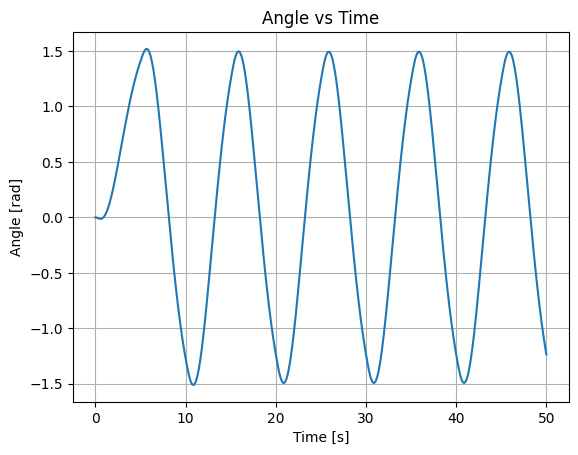

In [28]:
plt.plot(t, theta)
plt.xlabel('Time [s]')
plt.ylabel('Angle [rad]')
plt.title('Angle vs Time')
plt.grid(True)
plt.show()

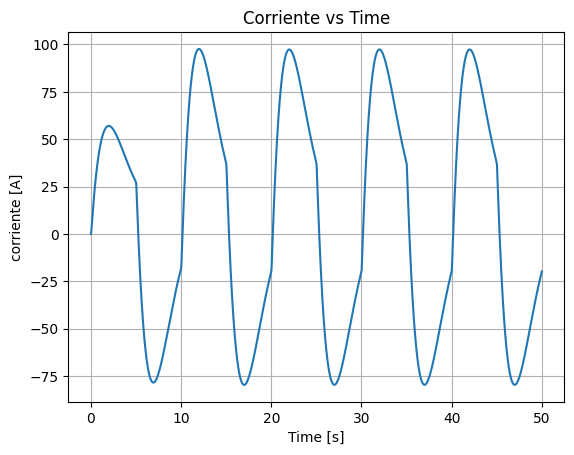

In [29]:
plt.plot(t, ia)
plt.xlabel('Time [s]')
plt.ylabel('corriente [A]')
plt.title('Corriente vs Time')
plt.grid(True)
plt.show()

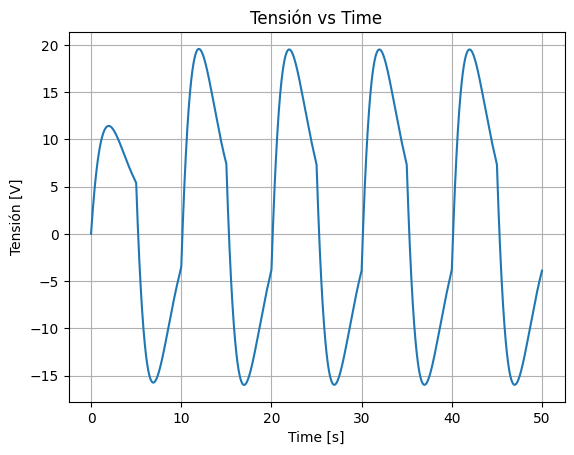

In [30]:
plt.plot(t, u)
plt.xlabel('Time [s]')
plt.ylabel('Tensión [V]')
plt.title('Tensión vs Time')
plt.grid(True)
plt.show()

#### Observación
Podemos observar que con el LQR la tensión de entrada es menor a 24V

### Con Observador

In [31]:
Ao = np.transpose(A)
Bo = np.transpose(C)
Co = np.transpose(B[:,[0]])

In [32]:
Qo = np.diag([100, 0.01, 1000])

In [33]:
Ro = np.array([[1]])

In [34]:
# Construcción del Hamiltoniano para el cálculo de la solución de Riccati
H_upper_o = np.hstack((Ao, -Bo @ np.linalg.inv(Ro) @ Bo.T))
H_lower_o = np.hstack((-Qo, -Ao.T))
H_o = np.vstack((H_upper_o, H_lower_o))
print("Hamilitoniano: ",H_o)

Hamilitoniano:  [[-4.000e+01  1.625e-02  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [-1.100e+01 -1.250e+00  1.000e+00  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00 -1.000e+00]
 [-1.000e+02 -0.000e+00 -0.000e+00  4.000e+01  1.100e+01 -0.000e+00]
 [-0.000e+00 -1.000e-02 -0.000e+00 -1.625e-02  1.250e+00 -0.000e+00]
 [-0.000e+00 -0.000e+00 -1.000e+03 -0.000e+00 -1.000e+00 -0.000e+00]]


In [35]:
# Calcular valores y vectores propios del Hamiltoniano
eigvals_o, eigvecs_o = np.linalg.eig(H_o)
eigvecs_o = eigvecs_o[:, np.real(eigvals_o) < 0]  # Seleccionar solo valores propios negativos
print("Eigenvalues: ",eigvals_o)
print("Eigenvectors: ",eigvecs_o)

Eigenvalues:  [-39.99538655  39.99538655 -31.62277644  -1.25461745   1.25461745
  31.62277644]
Eigenvectors:  [[-6.15097649e-01 -2.02002481e-06 -4.19401435e-04]
 [-1.74629141e-01 -1.04136612e-03 -9.99991942e-01]
 [-5.75788680e-07  3.16069601e-02  3.99857695e-06]
 [-7.68868927e-01 -2.77150323e-06  4.78726690e-05]
 [-3.45260710e-04 -3.18156823e-07 -3.99228293e-03]
 [-2.30288908e-05  9.99499833e-01  5.01668442e-06]]


In [36]:
# Separar matrices para resolver Riccati
X1o = eigvecs_o[:3, :]
X2o = eigvecs_o[3:, :]
Po = np.real(X2o @ np.linalg.inv(X1o))
print("Po", Po)

Po [[ 1.25015735e+00 -5.72195175e-04 -2.66403040e-05]
 [-5.72195175e-04  3.99255556e-03  1.21441588e-04]
 [-2.66403040e-05  1.21441588e-04  3.16227804e+01]]


In [37]:
# Ganancia del controlador LQR
K_lqr_o = np.linalg.inv(Ro) @ Bo.T @ Po
K_feedback_o = K_lqr_o[0, :-1]
K_integral_o = K_lqr_o[0, -1]
print("K_lqr_o", K_lqr_o)

K_lqr_o [[-2.66403040e-05  1.21441588e-04  3.16227804e+01]]


In [38]:
obsStateVector = np.array([ia[0], omega[0], theta[0]])

xObs = np.array([0, 0, 0])


In [39]:
iaO = np.zeros(len(t))
omegaO = np.zeros(len(t))
thetaO = np.zeros(len(t))
yO = np.zeros(len(t))
y = np.zeros(len(t))
u = np.zeros(len(t))
zeta = np.zeros(len(t))

obsStateVector = np.array([ia[0], omega[0], theta[0]])
xObs = np.array([0, 0, 0])

In [40]:
for i in range(1, len(t)):
    zetaP = reference[i] - np.dot(C_aug[0,:-1], stateVector) - C_aug[0,-1] * integ[i - 1]
    zeta[i] = integ[i - 1] + zetaP * h
    u[i] = -np.dot(K_feedback, obsStateVector) - K_integral * zeta[i]

    ia[i] = x[0]
    omega[i] = x[1]
    theta[i] = x[2]

    x1P = -Ra * x[0] / Laa - Km * x[1] / Laa + u[i] / Laa
    x2P = Ki * x[0] / J - Bm * x[1] / J - torque[i] / J
    x3P = x[1]
    xP = np.array([x1P, x2P, x3P])

    x = x + xP * h

    iaO[i] = xObs[0]
    omegaO[i] = xObs[1]
    thetaO[i] = xObs[2]

    # Salidad del Observador y del sistema
    yO[i] = np.dot(C, obsStateVector)  # Observador
    y[i] = np.dot(C_aug[0,:-1], stateVector) + C_aug[0,-1] * integ[i - 1]  # Sistema

    # Actualizar estado del observador
    xTP = np.dot(A, xObs) + np.dot(B[:, 0], u[i]) + np.dot(K_lqr_o, (y[i] - yO[i]))
    xObs = xObs + xTP[0] * h  # Observador

    # Actualizar vector de estados
    stateVector = np.array([ia[i], omega[i], theta[i]])
    integ[i] = zeta[i]
    obsStateVector = np.array([iaO[i], omegaO[i], thetaO[i]])

<ipython-input-40-569a03f3bf1a>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yO[i] = np.dot(C, obsStateVector)  # Observador


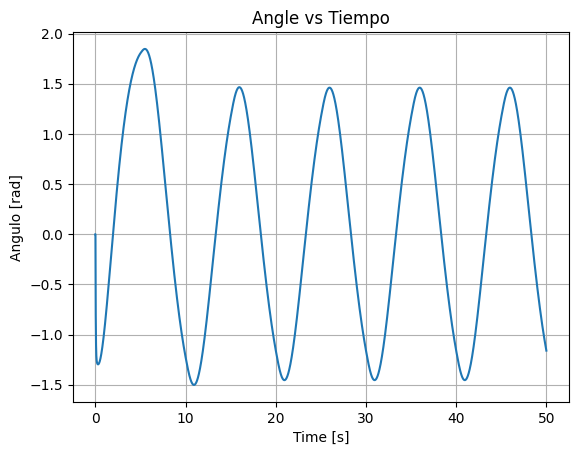

In [44]:
plt.plot(t, thetaO)
plt.xlabel('Time [s]')
plt.ylabel('Angulo [rad]')
plt.title('Angle vs Tiempo')
plt.grid(True)
plt.show()

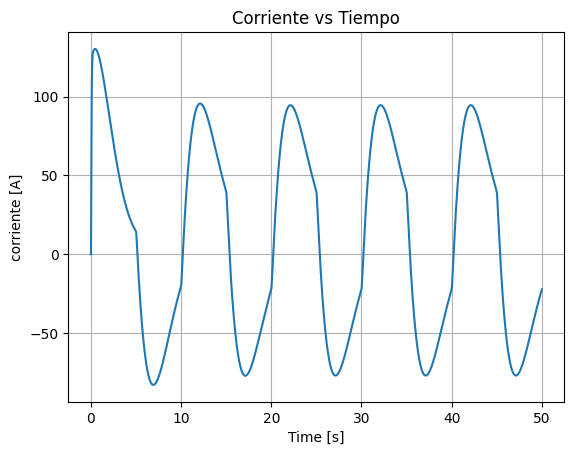

In [45]:
plt.plot(t, iaO)
plt.xlabel('Time [s]')
plt.ylabel('corriente [A]')
plt.title('Corriente vs Tiempo')
plt.grid(True)
plt.show()

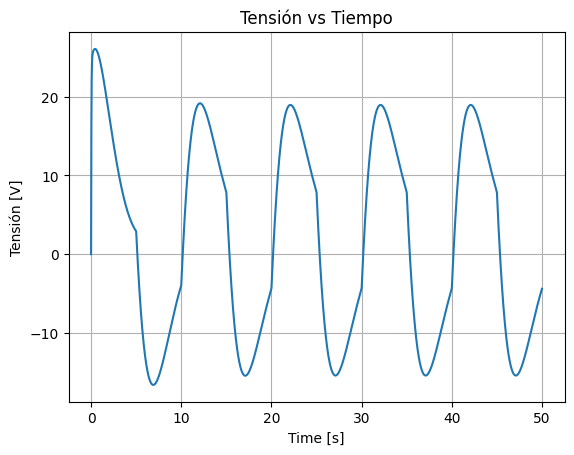

In [46]:
plt.plot(t, u)
plt.xlabel('Time [s]')
plt.ylabel('Tensión [V]')
plt.title('Tensión vs Tiempo')
plt.grid(True)
plt.show()

### Actuador con no-linealidad

Aplicamos una no-linealidad en el actuador del tipo zona muerta

In [59]:
dead_zone = 20
for i in range(1, len(t)):
    zetaP = reference[i] - np.dot(C_aug[0,:-1], stateVector) - C_aug[0,-1] * integ[i - 1]
    zeta[i] = integ[i - 1] + zetaP * h
    u[i] = -np.dot(K_feedback, obsStateVector) - K_integral * zeta[i]
    if abs(u[i]) < dead_zone:
        u[i] = 0
    else:
        u[i] = np.sign(u[i]) * (abs(u[i]) - dead_zone)
    ia[i] = x[0]
    omega[i] = x[1]
    theta[i] = x[2]

    x1P = -Ra * x[0] / Laa - Km * x[1] / Laa + u[i] / Laa
    x2P = Ki * x[0] / J - Bm * x[1] / J - torque[i] / J
    x3P = x[1]
    xP = np.array([x1P, x2P, x3P])

    x = x + xP * h

    iaO[i] = xObs[0]
    omegaO[i] = xObs[1]
    thetaO[i] = xObs[2]

    # Salidad del Observador y del sistema
    yO[i] = np.dot(C, obsStateVector)  # Observador
    y[i] = np.dot(C_aug[0,:-1], stateVector) + C_aug[0,-1] * integ[i - 1]  # Sistema

    # Actualizar estado del observador
    xTP = np.dot(A, xObs) + np.dot(B[:, 0], u[i]) + np.dot(K_lqr_o, (y[i] - yO[i]))
    xObs = xObs + xTP[0] * h  # Observador

    # Actualizar vector de estados
    stateVector = np.array([ia[i], omega[i], theta[i]])
    integ[i] = zeta[i]
    obsStateVector = np.array([iaO[i], omegaO[i], thetaO[i]])

<ipython-input-59-48ea7f83a3e8>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yO[i] = np.dot(C, obsStateVector)  # Observador


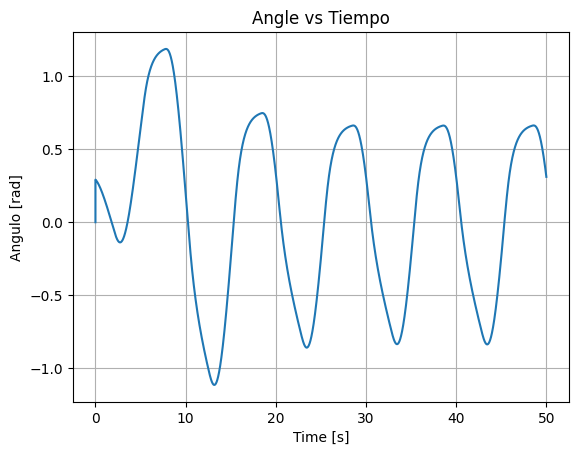

In [60]:
plt.plot(t, thetaO)
plt.xlabel('Time [s]')
plt.ylabel('Angulo [rad]')
plt.title('Angle vs Tiempo')
plt.grid(True)
plt.show()

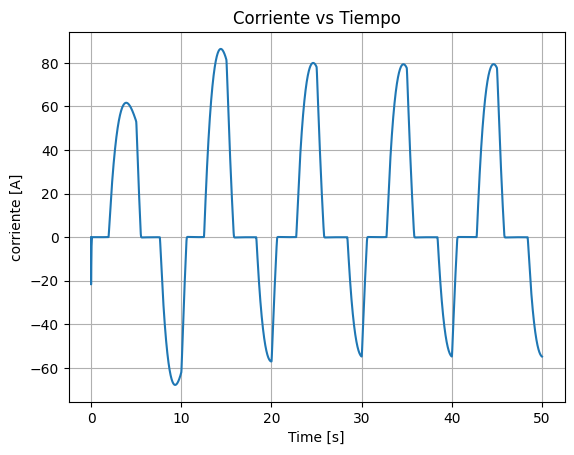

In [61]:
plt.plot(t, iaO)
plt.xlabel('Time [s]')
plt.ylabel('corriente [A]')
plt.title('Corriente vs Tiempo')
plt.grid(True)
plt.show()

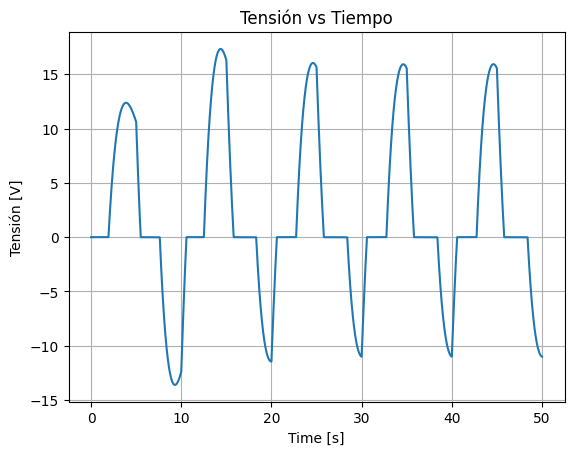

In [62]:
plt.plot(t, u)
plt.xlabel('Time [s]')
plt.ylabel('Tensión [V]')
plt.title('Tensión vs Tiempo')
plt.grid(True)
plt.show()

Con una no linealidad de 20V en la zona muerta del actuador el sistema tiene problemas para llegar a la referencia

#### Observación
La tensión de entrada esta por debajo de los 24V

### Conclusiones

Con el controlador LQR fuimos capaces de regular la tensión de entrada para que no sobrepasase el límite de 24V. Si lo comparamos con el PID de la actividad 1 este tiene mucho mas tensión al principio superando los 30V.

In [79]:
# Clear all variables (manually in Python)
# Usually, you can use the following to clear the namespace
from IPython import get_ipython
get_ipython().magic('reset -sf')  # Clear all variables in an interactive session

# Close all figures
import matplotlib.pyplot as plt
plt.close('all')

# Clear the command window (not directly possible, but you can mimic it)
import os
os.system('cls' if os.name == 'nt' else 'clear')

0

# Caso de Estudio 2.  Sistema lineal de cuatro variables de estado

### Controlador Continuo Por Asinación de Polos

In [80]:
a = 0.07
b = 5
c = 150
w = 9

In [81]:
import numpy as np

A = np.array([
    [-a, a, 0, 0],
    [0, 0, 1, 0],
    [w**2, -w**2, 0, 0],
    [c, 0, 0, 0]
])

In [82]:
B = np.array([[0], [0], [b * w**2], [0]])


In [83]:
C = np.array([
    [0, 0, 0, 1],
    [0, 1, 0, 0]
])

In [84]:
D = np.array([[0]])

In [85]:
from scipy.signal import place_poles

# Definimos los polos de la consigna
p1 = -15 + 15j
p2 = -15 - 15j
p3 = -0.5 + 0.5j
p4 = -0.5 - 0.5j
poles = [p1, p2, p3, p4]

# Obtención de la matriz K usando places poles
result = place_poles(A, B, poles)
K = result.gain_matrix

print("K =", K)

K = [[15.42104257  0.98107383  0.07637037  0.05291005]]


In [86]:
Ap = A - B @ K

In [87]:
C_row = C[0, :].reshape(1, -1)

In [88]:
C[0,:]

array([0, 0, 0, 1])

In [89]:
G = -np.linalg.inv([C[0,:]@np.linalg.inv(A-B*K)@B])

In [90]:
G

array([[0.05291005]])

In [91]:
# Parametros de inicialización
T = 100
h = 1e-4
t = np.arange(0, T, h)
ref = 100

# Variables de estado
alpha = np.zeros(len(t))
phi = np.zeros(len(t))
phiP = np.zeros(len(t))
high = np.zeros(len(t))
u = np.zeros(len(t))
uu = np.zeros(len(t))

# Condiciones Iniciales
alpha[0] = 0
phi[0] = 0
phiP[0] = 0
high[0] = 500
u[0] = 0
uu[0] = 0

# Vector de estado
stateVector = np.array([alpha[0], phi[0], phiP[0], high[0]])

# Punto de Operación
xOp = np.array([0, 0, 0, 0])
xOp = np.array([alpha[0], phi[0], phiP[0], high[0]])

# Condiciones Iniciales del observador
alphaO = np.zeros(len(t))
phiO = np.zeros(len(t))
phiPO = np.zeros(len(t))
highO = np.zeros(len(t))

alphaO[0] = 0
phiO[0] = 0
phiPO[0] = 0
highO[0] = 400

# variables de estado del observador
xObs = np.array([alphaO[0], phiO[0], phiPO[0], highO[0]])
obsStateVector = np.array([alphaO[0], phiO[0], phiPO[0], highO[0]])

# Zona muerta
deadZone = 0.1


In [92]:
uSO = np.zeros(len(t))
alphaSO = np.zeros(len(t))
phiSO = np.zeros(len(t))
phiPSO = np.zeros(len(t))
highSO = np.zeros(len(t))

uSO[0] = 0
xSO = np.array([alpha[0], phi[0], phiP[0], high[0]])
xSO=xSO.reshape(-1,1)
stateVectorSO = np.array([alpha[0], phi[0], phiP[0], high[0]])

# Simulación
for i in range(1, len(t)):
    uSO[i] = -K @ stateVectorSO + G * ref

    alphaSO[i] = xSO[0]
    phiSO[i] = xSO[1]
    phiPSO[i] = xSO[2]
    highSO[i] = xSO[3]

    xp_so = A @ xSO + B * uSO[i]
    xSO = xSO + h * xp_so

    stateVectorSO = np.array([alphaSO[i], phiSO[i], phiPSO[i], highSO[i]])

print("AlphaSO:", alphaSO)
print("PhiSO:", phiSO)
print("PhiPSO:", phiPSO)
print("HighSO:", highSO)


<ipython-input-92-96175e54fd1b>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  uSO[i] = -K @ stateVectorSO + G * ref  # Use @ for matrix multiplication
<ipython-input-92-96175e54fd1b>:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alphaSO[i] = xSO[0]
<ipython-input-92-96175e54fd1b>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phiSO[i] = xSO[1]
<ipython-input-92-96175e54fd1b>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is depr

AlphaSO: [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.83286497e-13
 2.83286497e-13 2.83286497e-13]
PhiSO: [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.83288101e-13
 2.83288103e-13 2.83288105e-13]
PhiPSO: [ 0.00000000e+00  0.00000000e+00 -8.57142857e-01 ...  1.99221824e-17
  1.99091863e-17  1.98961741e-17]
HighSO: [  0. 500. 500. ... 100. 100. 100.]


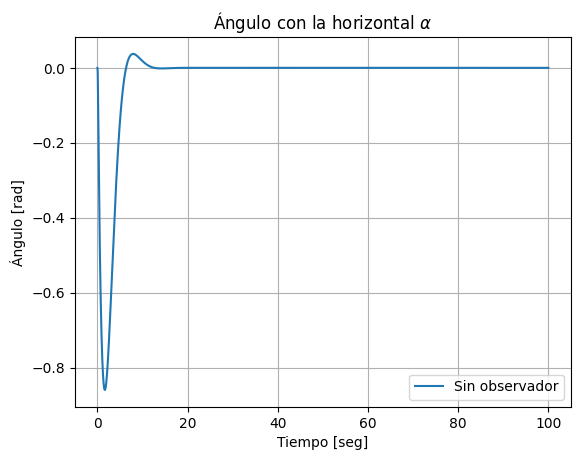

In [93]:
plt.plot(t, alphaSO, linewidth=1.5, label='Sin observador')


plt.title(r'Ángulo con la horizontal $\alpha$')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Ángulo [rad]')
plt.grid(True)

plt.legend()

plt.show()

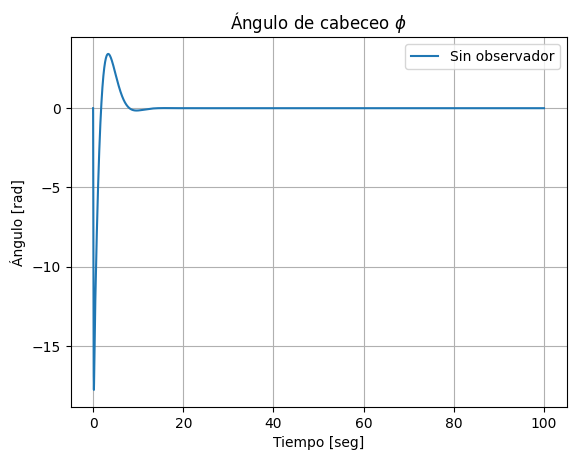

In [94]:
plt.plot(t, phiSO, linewidth=1.5, label='Sin observador')

plt.title(r'Ángulo de cabeceo $\phi$')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Ángulo [rad]')
plt.grid(True)

plt.legend()

plt.show()

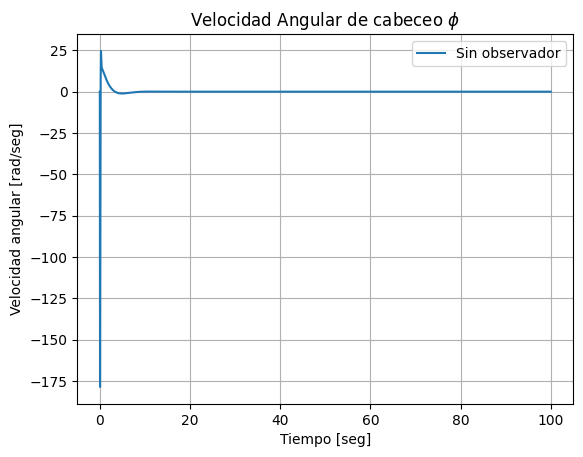

In [95]:
plt.plot(t, phiPSO, linewidth=1.5, label='Sin observador')

plt.title(r'Velocidad Angular de cabeceo $\phi$')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Velocidad angular [rad/seg]')
plt.grid(True)

plt.legend()

plt.show()

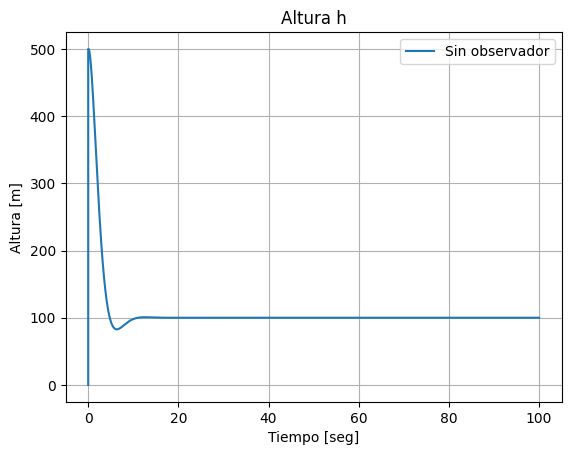

In [96]:
plt.plot(t, highSO, linewidth=1.5, label='Sin observador')

plt.title(r'Altura h')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Altura [m]')
plt.grid(True)

plt.legend()

plt.show()

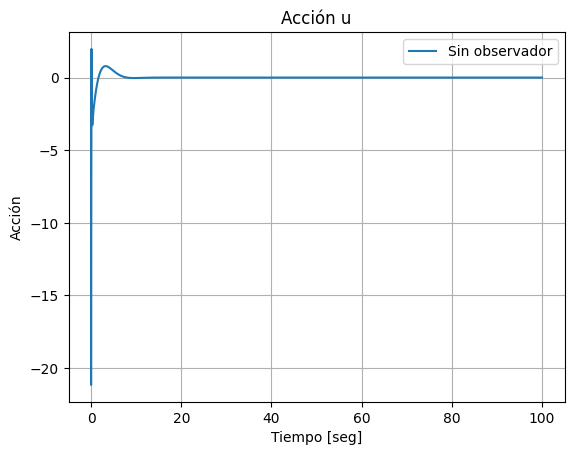

In [97]:
plt.plot(t, uSO, linewidth=1.5, label='Sin observador')

plt.title(r'Acción u')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Acción')
plt.grid(True)

plt.legend()

plt.show()

In [98]:
# Clear all variables (manually in Python)
# Usually, you can use the following to clear the namespace
from IPython import get_ipython
get_ipython().magic('reset -sf')  # Clear all variables in an interactive session

# Close all figures
import matplotlib.pyplot as plt
plt.close('all')

# Clear the command window (not directly possible, but you can mimic it)
import os
os.system('cls' if os.name == 'nt' else 'clear')

0

### Controlador Discreto LQR con Observador y Referencia distinta de Cero

In [100]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.3 MB/s eta 0:00:00


In [101]:
import control as ctl  # Import the control library instead of scipy.signal
from control import ss,c2d
import numpy as np

In [107]:
Ts = 0.01  # Tiempo de muestreo
T = 25     # Tiempo Total
Kmax = int(T / Ts)  # Numero de pasos

a = 0.07
b = 5
c = 150
w = 9

In [108]:
A = np.array([
    [-a, a, 0, 0],
    [0, 0, 1, 0],
    [w**2, -w**2, 0, 0],
    [c, 0, 0, 0]
])

B = np.array([[0], [0], [b * w**2], [0]])

C = np.array([
    [0, 0, 0, 1],
    [0, 1, 0, 0]
])

D = np.array([[0]])

sys1 = ss(A, B, C, [[0],[0]])

print(sys1)

<StateSpace>: sys[2]
Inputs (1): ['u[0]']
Outputs (2): ['y[0]', 'y[1]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[-7.0e-02  7.0e-02  0.0e+00  0.0e+00]
     [ 0.0e+00  0.0e+00  1.0e+00  0.0e+00]
     [ 8.1e+01 -8.1e+01  0.0e+00  0.0e+00]
     [ 1.5e+02  0.0e+00  0.0e+00  0.0e+00]]

B = [[  0.]
     [  0.]
     [405.]
     [  0.]]

C = [[0. 0. 0. 1.]
     [0. 1. 0. 0.]]

D = [[0.]
     [0.]]



In [109]:
# Convertimos a discreto usando un rententor de orden cero
dSys1 = c2d(sys1, Ts, method='zoh')

print(dSys1)

<StateSpace>: sys[2]$sampled
Inputs (1): ['u[0]']
Outputs (2): ['y[0]', 'y[1]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[ 9.99301189e-01  6.98810770e-04  3.49682228e-06  0.00000000e+00]
     [ 4.04632292e-03  9.95953677e-01  9.98650783e-03  0.00000000e+00]
     [ 8.08623891e-01 -8.08623891e-01  9.95953677e-01  0.00000000e+00]
     [ 1.49947548e+00  5.24523341e-04  1.74898534e-06  1.00000000e+00]]

B = [[4.72226043e-06]
     [2.02363369e-02]
     [4.04453567e+00]
     [1.77114873e-06]]

C = [[0. 0. 0. 1.]
     [0. 1. 0. 0.]]

D = [[0.]
     [0.]]

dt = 0.01



In [110]:
# Matrices en tiempo discreto
A = dSys1.A
B = dSys1.B

print("Discrete-time A matrix:\n", A)
print("Discrete-time B matrix:\n", B)

Discrete-time A matrix:
 [[ 9.99301189e-01  6.98810770e-04  3.49682228e-06  0.00000000e+00]
 [ 4.04632292e-03  9.95953677e-01  9.98650783e-03  0.00000000e+00]
 [ 8.08623891e-01 -8.08623891e-01  9.95953677e-01  0.00000000e+00]
 [ 1.49947548e+00  5.24523341e-04  1.74898534e-06  1.00000000e+00]]
Discrete-time B matrix:
 [[4.72226043e-06]
 [2.02363369e-02]
 [4.04453567e+00]
 [1.77114873e-06]]


In [111]:
Cref = C[0, :]

# Construcción de matriz ampliada
Aamp1 = np.block([
    [A, np.zeros((4, 1))],
    [-np.dot(Cref, A), np.eye(1)]
])

print("Cref:\n", Cref)
print("Aamp1:\n", Aamp1)

Cref:
 [0 0 0 1]
Aamp1:
 [[ 9.99301189e-01  6.98810770e-04  3.49682228e-06  0.00000000e+00
   0.00000000e+00]
 [ 4.04632292e-03  9.95953677e-01  9.98650783e-03  0.00000000e+00
   0.00000000e+00]
 [ 8.08623891e-01 -8.08623891e-01  9.95953677e-01  0.00000000e+00
   0.00000000e+00]
 [ 1.49947548e+00  5.24523341e-04  1.74898534e-06  1.00000000e+00
   0.00000000e+00]
 [-1.49947548e+00 -5.24523341e-04 -1.74898534e-06 -1.00000000e+00
   1.00000000e+00]]


In [112]:
Bamp1 = np.vstack([B, -np.dot(Cref, B)])

print("Bamp1:\n", Bamp1)

Bamp1:
 [[ 4.72226043e-06]
 [ 2.02363369e-02]
 [ 4.04453567e+00]
 [ 1.77114873e-06]
 [-1.77114873e-06]]


In [113]:
Q1 = np.diag([50000, 100000, 10000, 1, 1])

print("Q1:\n", Q1)

Q1:
 [[ 50000      0      0      0      0]
 [     0 100000      0      0      0]
 [     0      0  10000      0      0]
 [     0      0      0      1      0]
 [     0      0      0      0      1]]


In [115]:
from control import dlqr

R1 = 250000000000

# Matriz de Ganacia del LQR
K1, P1, _ = dlqr(Aamp1, Bamp1, Q1, R1)

print("K1:\n", K1)

K1:
 [[ 1.25030703e+00  2.33663798e-04  1.18057570e-03  1.82295663e-03
  -1.99521941e-06]]


In [116]:
Kp1 = K1[0, :4]  # Proporcional
print("Kp1:\n", Kp1)

Kp1:
 [1.25030703e+00 2.33663798e-04 1.18057570e-03 1.82295663e-03]


In [117]:
Kint1 = -K1[0, 4] # Integrador
print("Kint:\n", Kint1)

Kint:
 1.9952194120860476e-06


In [118]:
# Matrices Observador
Ao = A.T
Bo = C.T
Co = B.T

Qo = np.diag([0.001, 5, 0.5, 0.0001])
Ro = np.diag([80000, 1280000])

Ko, _, _ = dlqr(Ao, Bo, Qo, Ro)

Ko = Ko.T

print("Ko:\n", Ko)

Ko:
 [[ 1.13649950e-04  1.12402770e-06]
 [-2.50053620e-03  1.28292024e-03]
 [-3.31737875e-03 -1.13490298e-03]
 [ 1.86871478e-02 -1.52540115e-04]]


In [119]:
KMAX = 5000

In [120]:
t = np.arange(0, KMAX * Ts, Ts)
x = np.array([[0], [0], [0], [500]])
ve = np.zeros(KMAX)
u_k = np.zeros(KMAX)
xang = np.zeros((4, 1))
xang[3][0] = 400
alpha = np.zeros(KMAX)
phi = np.zeros(KMAX)
phip = np.zeros(KMAX)
high = np.zeros(KMAX)

ref = 100

dead_zone = 0

# Simulación

for ki in range(1, KMAX):
    ve[ki] = ve[ki - 1] + ref - Cref @ x
    u = -Kp1 @ xang + Kint1 * ve[ki]
    if abs(u)<dead_zone:
      u = np.sign(u)*(abs(u)-dead_zone)
    ys = Cref @ x  # This should be measured y
    x = A @ x + B * u
    alpha[ki] = x[0]
    phi[ki] = x[1]
    phip[ki] = x[2]
    high[ki] = x[3]
    u_k[ki] = u
    xang = A @ xang + B * u + Ko @ (ys - C @ xang)

<ipython-input-120-264ab19a527f>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ve[ki] = ve[ki - 1] + ref - Cref @ x
<ipython-input-120-264ab19a527f>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha[ki] = x[0]
<ipython-input-120-264ab19a527f>:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phi[ki] = x[1]
<ipython-input-120-264ab19a527f>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensu

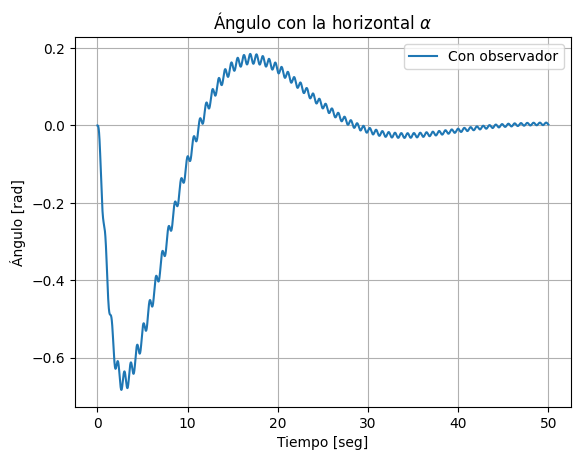

In [121]:
# Plotting the data
plt.plot(t, alpha, linewidth=1.5, label='Con observador')

# If you have another dataset for comparison (without observer)
# plt.plot(t, alpha_without_observer, label='Sin observador')  # Uncomment this if you have data

# Add title, labels, and grid
plt.title(r'Ángulo con la horizontal $\alpha$')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Ángulo [rad]')
plt.grid(True)

# Add legend
plt.legend()

# Display the plot
plt.show()

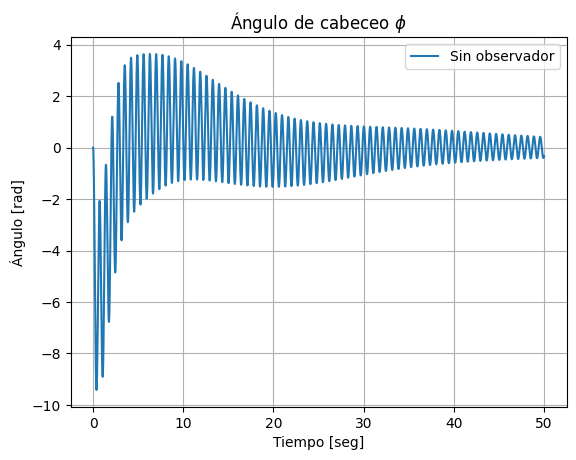

In [122]:
plt.plot(t, phi, linewidth=1.5, label='Sin observador')

# Add title, labels, and grid
plt.title(r'Ángulo de cabeceo $\phi$')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Ángulo [rad]')
plt.grid(True)

# Add legend
plt.legend()

# Display the plot
plt.show()

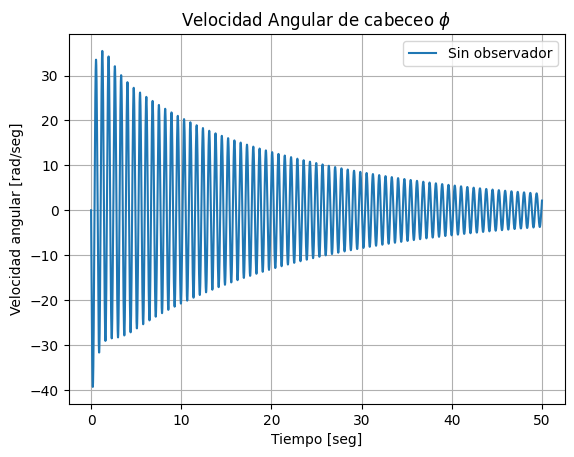

In [123]:
plt.plot(t, phip, linewidth=1.5, label='Sin observador')

# Add title, labels, and grid
plt.title(r'Velocidad Angular de cabeceo $\phi$')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Velocidad angular [rad/seg]')
plt.grid(True)

# Add legend
plt.legend()

# Display the plot
plt.show()

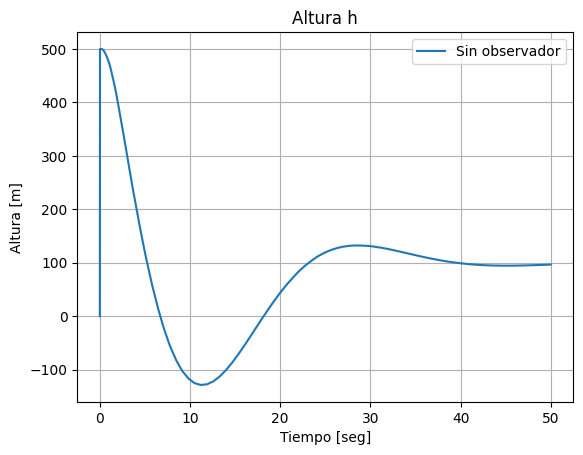

In [124]:
plt.plot(t, high, linewidth=1.5, label='Sin observador')

# Add title, labels, and grid
plt.title(r'Altura h')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Altura [m]')
plt.grid(True)

# Add legend
plt.legend()

# Display the plot
plt.show()

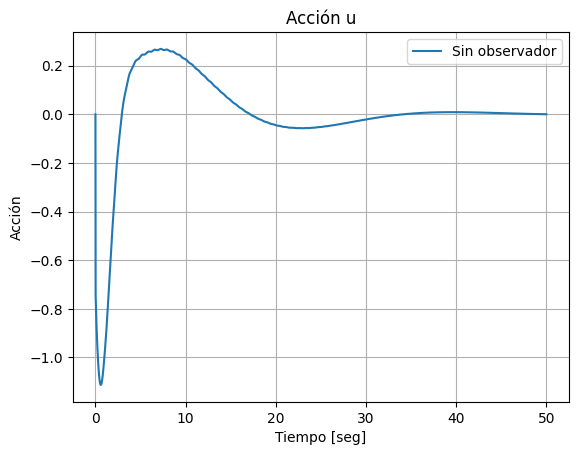

In [125]:
plt.plot(t, u_k, linewidth=1.5, label='Sin observador')

# Add title, labels, and grid
plt.title(r'Acción u')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Acción')
plt.grid(True)

# Add legend
plt.legend()

# Display the plot
plt.show()

### Actuador con no-linealidad

In [153]:
t = np.arange(0, KMAX * Ts, Ts)
x = np.array([[0], [0], [0], [500]])
ve = np.zeros(KMAX)
u_k = np.zeros(KMAX)
xang = np.zeros((4, 1))
xang[3][0] = 400
alpha = np.zeros(KMAX)
phi = np.zeros(KMAX)
phip = np.zeros(KMAX)
high = np.zeros(KMAX)

ref = 100

dead_zone = 0.1

# Simulación

for ki in range(1, KMAX):
    ve[ki] = ve[ki - 1] + ref - Cref @ x
    u = -Kp1 @ xang + Kint1 * ve[ki]
    if abs(u)<dead_zone:
      u = 0
    else:
      u = np.sign(u)*(abs(u)-dead_zone)
    ys = Cref @ x  # This should be measured y
    x = A @ x + B * u
    alpha[ki] = x[0]
    phi[ki] = x[1]
    phip[ki] = x[2]
    high[ki] = x[3]
    u_k[ki] = u
    xang = A @ xang + B * u + Ko @ (ys - C @ xang)

<ipython-input-153-bb52d65fbcf5>:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ve[ki] = ve[ki - 1] + ref - Cref @ x
<ipython-input-153-bb52d65fbcf5>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  alpha[ki] = x[0]
<ipython-input-153-bb52d65fbcf5>:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  phi[ki] = x[1]
<ipython-input-153-bb52d65fbcf5>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensu

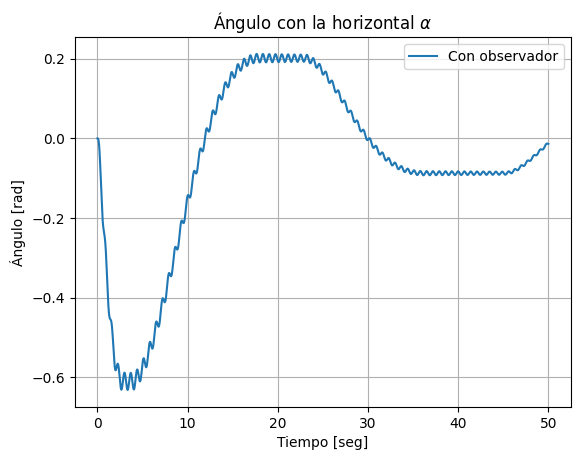

In [154]:
# Plotting the data
plt.plot(t, alpha, linewidth=1.5, label='Con observador')

# If you have another dataset for comparison (without observer)
# plt.plot(t, alpha_without_observer, label='Sin observador')  # Uncomment this if you have data

# Add title, labels, and grid
plt.title(r'Ángulo con la horizontal $\alpha$')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Ángulo [rad]')
plt.grid(True)

# Add legend
plt.legend()

# Display the plot
plt.show()

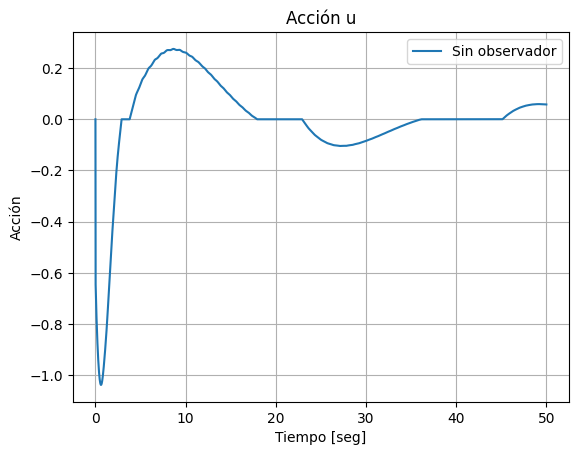

In [155]:
plt.plot(t, u_k, linewidth=1.5, label='Sin observador')

# Add title, labels, and grid
plt.title(r'Acción u')
plt.xlabel('Tiempo [seg]')
plt.ylabel('Acción')
plt.grid(True)

# Add legend
plt.legend()

# Display the plot
plt.show()

### Conclusiones

Implementando el controlador discreto del tipo LQR se logró mantener dentro de la unidad el valor de la acción de control u y del angulo horizontal $\alpha$. Se debe sequir ajustando los valores de Q y R para que el angulo de cabeceo de menor a la unidad. Por otro lado si aplicamos una no-linealidad en el actuador encontramos el limite en 0.1, apartir de este valor el sistema no logra llegar a la referencia

In [156]:
# Clear all variables (manually in Python)
# Usually, you can use the following to clear the namespace
from IPython import get_ipython
get_ipython().magic('reset -sf')  # Clear all variables in an interactive session

# Close all figures
import matplotlib.pyplot as plt
plt.close('all')

# Clear the command window (not directly possible, but you can mimic it)
import os
os.system('cls' if os.name == 'nt' else 'clear')

0

# Caso de Estudio 3.  Sistema no lineal de cuatro variables de estado



### Controlador LQR en tiempo discreto con observador y referencia distinta de cero

In [157]:
m = 0.1  # Mass of the pendulum (kg)
F = 0.1  # Force (N)
l = 1.6  # Length of the pendulum (m)
g = 9.8  # Acceleration due to gravity (m/s^2)
M = 1.5  # Mass of the cart (kg)


In [158]:
import numpy as np

#Versión linealizada en el equilibrio inestable. Sontag Pp 104.
Ac = np.array([
    [0, 1, 0, 0],
    [0, -F/M, -m*g/M, 0],
    [0, 0, 0, 1],
    [0, -F/(l*M), -g*(m+M)/(l*M), 0]
])

print(Ac)

[[ 0.          1.          0.          0.        ]
 [ 0.         -0.06666667 -0.65333333  0.        ]
 [ 0.          0.          0.          1.        ]
 [ 0.         -0.04166667 -6.53333333  0.        ]]


In [159]:
Bc = np.array([[0],
               [1/M],
               [0],
               [1/(l*M)]])

Cc = np.array([
    [1, 0, 0, 0],
    [0, 0, 1, 0]
])

Dc = np.array([[0],[0]])

print("Bc:\n", Bc)
print("Cc:\n", Cc)
print("Dc:\n", Dc)


Bc:
 [[0.        ]
 [0.66666667]
 [0.        ]
 [0.41666667]]
Cc:
 [[1 0 0 0]
 [0 0 1 0]]
Dc:
 [[0]
 [0]]


In [161]:
Ts = 1e-2
T = 25
Kmax = int(T / Ts)  # Numero de Pasos

print("Ts:", Ts)
print("T:", T)
print("Kmax:", Kmax)

Ts: 0.01
T: 25
Kmax: 2500


In [162]:
from control import ss,c2d

sys1 = ss(Ac, Bc, Cc, Dc)

print(sys1)

<StateSpace>: sys[4]
Inputs (1): ['u[0]']
Outputs (2): ['y[0]', 'y[1]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[ 0.          1.          0.          0.        ]
     [ 0.         -0.06666667 -0.65333333  0.        ]
     [ 0.          0.          0.          1.        ]
     [ 0.         -0.04166667 -6.53333333  0.        ]]

B = [[0.        ]
     [0.66666667]
     [0.        ]
     [0.41666667]]

C = [[1. 0. 0. 0.]
     [0. 0. 1. 0.]]

D = [[0.]
     [0.]]



In [163]:
# Convertimos el sistema a tiempo discreto
dSys1 = c2d(sys1, Ts, method='zoh')

print(dSys1)

<StateSpace>: sys[4]$sampled
Inputs (1): ['u[0]']
Outputs (2): ['y[0]', 'y[1]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[ 1.00000000e+00  9.99666742e-03 -3.26576304e-05 -1.08867187e-07]
     [ 0.00000000e+00  9.99333560e-01 -6.53044478e-03 -3.26576304e-05]
     [ 0.00000000e+00 -2.08275704e-06  9.99673356e-01  9.99891116e-03]
     [ 0.00000000e+00 -4.16482448e-04 -6.53248588e-02  9.99673356e-01]]

B = [[3.33258138e-05]
     [6.66439958e-03]
     [2.08275704e-05]
     [4.16482448e-03]]

C = [[1. 0. 0. 0.]
     [0. 0. 1. 0.]]

D = [[0.]
     [0.]]

dt = 0.01



In [164]:
# Matrices en tiempo discreto
A = dSys1.A
B = dSys1.B

print("Discrete-time A matrix:\n", A)
print("Discrete-time B matrix:\n", B)

Discrete-time A matrix:
 [[ 1.00000000e+00  9.99666742e-03 -3.26576304e-05 -1.08867187e-07]
 [ 0.00000000e+00  9.99333560e-01 -6.53044478e-03 -3.26576304e-05]
 [ 0.00000000e+00 -2.08275704e-06  9.99673356e-01  9.99891116e-03]
 [ 0.00000000e+00 -4.16482448e-04 -6.53248588e-02  9.99673356e-01]]
Discrete-time B matrix:
 [[3.33258138e-05]
 [6.66439958e-03]
 [2.08275704e-05]
 [4.16482448e-03]]


In [165]:
Cref = Cc[0, :]

Aamp1 = np.block([
    [A, np.zeros((4, 1))],
    [-np.dot(Cref, A), np.eye(1)]
])

print("Cref:\n", Cref)
print("Aamp1:\n", Aamp1)

Cref:
 [1 0 0 0]
Aamp1:
 [[ 1.00000000e+00  9.99666742e-03 -3.26576304e-05 -1.08867187e-07
   0.00000000e+00]
 [ 0.00000000e+00  9.99333560e-01 -6.53044478e-03 -3.26576304e-05
   0.00000000e+00]
 [ 0.00000000e+00 -2.08275704e-06  9.99673356e-01  9.99891116e-03
   0.00000000e+00]
 [ 0.00000000e+00 -4.16482448e-04 -6.53248588e-02  9.99673356e-01
   0.00000000e+00]
 [-1.00000000e+00 -9.99666742e-03  3.26576304e-05  1.08867187e-07
   1.00000000e+00]]


In [166]:
Bamp1 = np.vstack([B, -np.dot(Cref, B)])

print("Bamp1:\n", Bamp1)

Bamp1:
 [[ 3.33258138e-05]
 [ 6.66439958e-03]
 [ 2.08275704e-05]
 [ 4.16482448e-03]
 [-3.33258138e-05]]


In [167]:
Q1 = np.diag([0.1, 1, 1, 1e-4, 1e-4])

print("Q1:\n", Q1)

Q1:
 [[1.e-01 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 1.e-04 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 1.e-04]]


In [169]:
from control import dlqr

R1 = 0.05
# calculo de la matriz de ganancia del lqr
K1, P1, _ = dlqr(Aamp1, Bamp1, Q1, R1)

print("K1:\n", K1)

K1:
 [[ 7.97315188  6.99811521  3.48833679 -0.08883985 -0.04368156]]


In [170]:
Kp1 = K1[0, :4]  # Ganancia proporcional

print("Kp1:\n", Kp1)

Kp1:
 [ 7.97315188  6.99811521  3.48833679 -0.08883985]


In [171]:
Kint1 = -K1[0, 4] # Ganancia del integrador
Kint1

0.04368156192915914

In [172]:
m1 = 10 * m

# Definimos la matriz A para el actuador en la segunda condicion cuando la masa es 10*m
Ac2 = np.array([
    [0, 1, 0, 0],
    [0, -F/M, -m1*g/M, 0],
    [0, 0, 0, 1],
    [0, -F/(l*M), -g*(m1+M)/(l*M), 0]
])

print("Ac2:\n", Ac2)

Ac2:
 [[  0.           1.           0.           0.        ]
 [  0.          -0.06666667  -6.53333333   0.        ]
 [  0.           0.           0.           1.        ]
 [  0.          -0.04166667 -10.20833333   0.        ]]


In [173]:
sys2 = ss(Ac2, Bc, Cc, Dc)

print(sys2)

<StateSpace>: sys[6]
Inputs (1): ['u[0]']
Outputs (2): ['y[0]', 'y[1]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[  0.           1.           0.           0.        ]
     [  0.          -0.06666667  -6.53333333   0.        ]
     [  0.           0.           0.           1.        ]
     [  0.          -0.04166667 -10.20833333   0.        ]]

B = [[0.        ]
     [0.66666667]
     [0.        ]
     [0.41666667]]

C = [[1. 0. 0. 0.]
     [0. 0. 1. 0.]]

D = [[0.]
     [0.]]



In [174]:
dSys2 = c2d(sys2, Ts, method='zoh')

print(dSys2)

<StateSpace>: sys[6]$sampled
Inputs (1): ['u[0]']
Outputs (2): ['y[0]', 'y[1]']
States (4): ['x[0]', 'x[1]', 'x[2]', 'x[3]']

A = [[ 1.00000000e+00  9.99666752e-03 -3.26566303e-04 -1.08865186e-06]
     [ 0.00000000e+00  9.99333601e-01 -6.53004478e-02 -3.26566303e-04]
     [ 0.00000000e+00 -2.08269326e-06  9.99489672e-01  9.99829881e-03]
     [ 0.00000000e+00 -4.16456938e-04 -1.02052360e-01  9.99489672e-01]]

B = [[3.33247932e-05]
     [6.66399141e-03]
     [2.08269326e-05]
     [4.16456938e-03]]

C = [[1. 0. 0. 0.]
     [0. 0. 1. 0.]]

D = [[0.]
     [0.]]

dt = 0.01



In [175]:
import numpy as np
from control import ss, c2d, dlqr,lqr
A2 = dSys2.A
B2 = dSys2.B

Cref = Cc[0, :]

Aamp2 = np.block([
    [A2, np.zeros((4, 1))],
    [-np.dot(Cref, A2), np.eye(1)]
])

Q2 = np.diag([0.1, 1, 1, 1e-4, 1e-4])
R2 = 0.05

K2, P2, _ = dlqr(Aamp2, Bamp1, Q2, R2)

Kp2 = K2[0, :4]

Kint2 = -K2[0, 4]

print("K2:\n", K2)
print("Kp2:\n", Kp2)
print("Kint2:", Kint2)


K2:
 [[ 8.39724121  7.7828109  -0.47307662 -2.0307997  -0.04374543]]
Kp2:
 [ 8.39724121  7.7828109  -0.47307662 -2.0307997 ]
Kint2: 0.04374543043349237


In [176]:
# Matrices del observador
Ao = A.T  # Transpose of A
Bo = Cc.T  # Transpose of Cc
Co = B.T  # Transpose of B
Qo = np.diag([0.001, 5, 0.5, 0.0001])
Ro = np.diag([80, 10000])

Ko, _, _ = dlqr(Ao, Bo, Qo, Ro)

Ko = Ko.T

print("Ko:\n", Ko)

Ko:
 [[ 7.05370879e-02 -1.08525551e-04]
 [ 2.39714091e-01 -1.06543847e-03]
 [-1.19592528e-02  6.85613825e-03]
 [ 3.05646867e-02 -5.11816519e-04]]


In [177]:
phi = np.array([np.pi])  # phi(1) = pi
x = np.array([0, 0, phi[0], 0])  # x = [0; 0; phi(1); 0]
x = x.reshape(-1,1)

phiPP = np.array([0])  # phiPP(1) = 0
h = Ts / 20

num_inner_loop_steps = int(Ts / h) * Kmax
delta = np.zeros(num_inner_loop_steps + 1)
deltaP = np.zeros(num_inner_loop_steps + 1)
phi = np.zeros(num_inner_loop_steps + 1)
omega = np.zeros(num_inner_loop_steps + 1)

delta[0] = 0
deltaP[0] = 0
phi[0] = np.pi
omega[0] = 0
i = 1
deltaRef = 10
bool_val = 0  #
v = np.array([0])  # v(1) = 0
xHat = np.array([0, 0, np.pi, 0])  # xHat = [0; 0; pi; 0]
xHat = xHat.reshape(-1,1)
xOp = np.array([0, 0, np.pi, 0])  # xOp = [0 0 pi 0]'
xOp = xOp.reshape(-1,1)
reference = np.array([10])  # reference(1) = 10

print("x:", x)
print("delta:", delta)
print("phi:", phi)
print("omega:", omega)
print("reference:", reference)

x: [[0.        ]
 [0.        ]
 [3.14159265]
 [0.        ]]
delta: [0. 0. 0. ... 0. 0. 0.]
phi: [3.14159265 0.         0.         ... 0.         0.         0.        ]
omega: [0. 0. 0. ... 0. 0. 0.]
reference: [10]


In [178]:
import numpy as np

# Controladores iniciales
K = Kp1
KI = Kint1
i = 0
bool_val = 0

v = np.zeros(Kmax + 1)
u1 = np.zeros(Kmax)
u = np.zeros(Kmax*int(Ts/h)+1)
reference = np.zeros(Kmax*int(Ts/h) + 1)
# Funcional de costo LQR
Jn = [0]
Qloop = Q1
Rloop = R1

# Funcion de Lyapunov
initial_state_vector = np.vstack([x.reshape(-1, 1), 0])
V_L = [initial_state_vector.T @ P1 @ initial_state_vector]

V_L = [V_L[0].item()]

V_L = []
Ploop = P1
# Simulación
deadZone = 1

for index in range(Kmax):
    state_vector_prev = np.vstack([x, v[index]])
    quadratic_value = state_vector_prev.T @ Ploop @ state_vector_prev
    V_L.append(quadratic_value.item())
    yOut = Cc @ x
    yOutObs = Cc @ (xHat)
    v[index + 1] = v[index] + deltaRef - yOut[0]

    u1[index] = -K @ (xHat) + KI * v[index + 1]

    # Zona muerta
    if np.abs(u1[index]) < deadZone:
        u1[index] = 0
    else:
        u1[index] = np.sign(u1[index]) * (np.abs(u1[index]) - deadZone)

    # Loop interno para simular con Euler la evolución No-lineal del sistema
    for j in range(int(Ts / h)):
        u[i] = u1[index]
        p_pp = (1 / (M + m)) * (u[i] - m * l * phiPP * np.cos(phi[i]) + m * l * omega[i]**2 * np.sin(phi[i]) - F * deltaP[i])
        phiPP = (1 / l) * (g * np.sin(phi[i]) - p_pp * np.cos(phi[i]))
        deltaP[i + 1] = deltaP[i] + h * p_pp
        delta[i + 1] = delta[i] + h * deltaP[i]
        omega[i + 1] = omega[i] + h * phiPP
        phi[i + 1] = phi[i] + h * omega[i]

        # Una vez que se llega a la disntancia de 10m cambiamos el controlador y el valor de la masa
        if delta[i] >= 9.99:
            if bool_val == 0:
                deltaRef = 0
                m = m * 10
                bool_val = 1
                K = Kp2
                KI = Kint2
                Qloop = Q2
                Rloop = R2
                Ploop = P2
        i += 1
        reference[i] = deltaRef

    x = np.array([delta[i-1], deltaP[i-1], phi[i-1], omega[i-1]])
    x = x.reshape(-1,1)

    xHat = A @ xHat.reshape(-1,1) + B * u1[index] + Ko @ (yOut - yOutObs)

    state_vector = np.vstack([x, v[index+1]])

    quadratic_cost = state_vector.T @ Qloop @ state_vector + u1[index].T * Rloop * u1[index]
    Jn.append(Jn[-1] + quadratic_cost[0][0])

u[i] = u1[index]

t = np.arange(0, T, h)


<ipython-input-178-3a21d5ee049b>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v[index + 1] = v[index] + deltaRef - yOut[0]
<ipython-input-178-3a21d5ee049b>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u1[index] = -K @ (xHat) + KI * v[index + 1]
<ipython-input-178-3a21d5ee049b>:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  deltaP[i + 1] = deltaP[i] + h * p_pp
<ipython-input-178-3a21d5ee049b>:52: DeprecationWarning: Conversion of an array with ndim > 0 

In [179]:
t_ = np.arange(0, T, Ts)

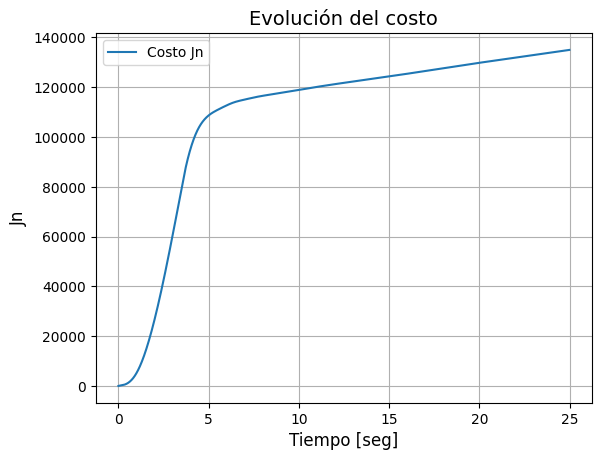

In [191]:
plt.plot(t_, Jn[:len(t_)], linewidth=1.5, label="Costo Jn")

plt.grid(True)
plt.title('Evolución del costo', fontsize=14)
plt.xlabel('Tiempo [seg]', fontsize=12)
plt.ylabel('Jn', fontsize=12)

plt.legend()

plt.show()

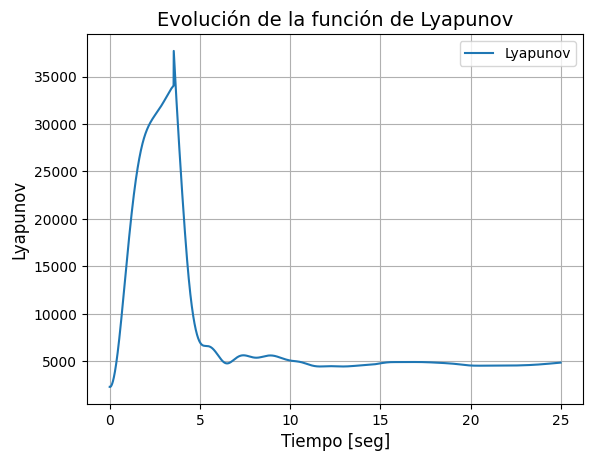

In [192]:
plt.plot(t_, V_L[:len(t_)], linewidth=1.5, label="Lyapunov")

plt.grid(True)
plt.title('Evolución de la función de Lyapunov', fontsize=14)
plt.xlabel('Tiempo [seg]', fontsize=12)
plt.ylabel('Lyapunov', fontsize=12)

plt.legend()

plt.show()

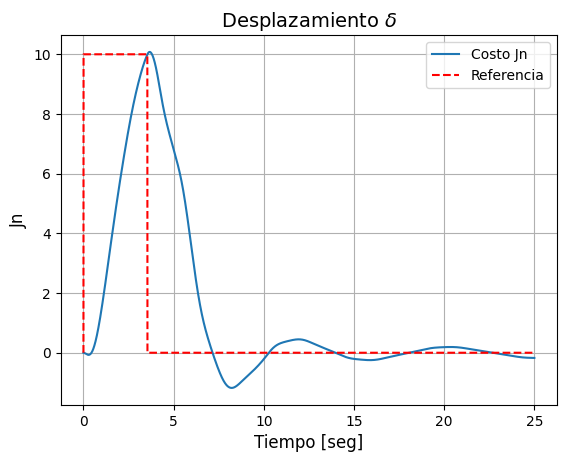

In [190]:
plt.plot(t, delta[:len(t)], linewidth=1.5, label="Costo Jn")
plt.plot(t, reference[:len(t)], 'r--', label="Referencia")

plt.grid(True)
plt.title('Desplazamiento $\delta$', fontsize=14)
plt.xlabel('Tiempo [seg]', fontsize=12)
plt.ylabel('Jn', fontsize=12)

plt.legend()

plt.show()

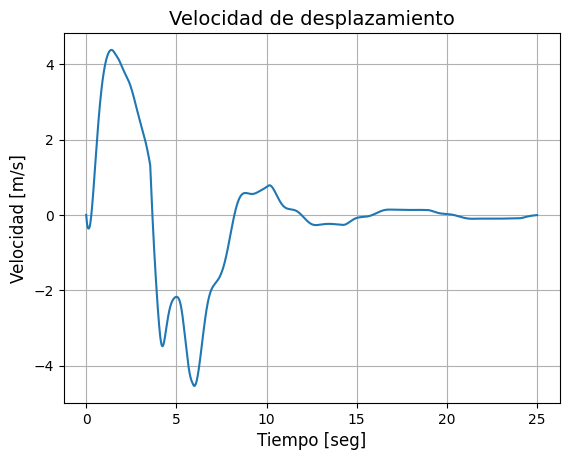

In [183]:
import matplotlib.pyplot as plt

plt.plot(t, deltaP[:len(t)], linewidth=1.5, label="Velocidad de desplazamiento")

plt.grid(True)
plt.title('Velocidad de desplazamiento', fontsize=14)
plt.xlabel('Tiempo [seg]', fontsize=12)
plt.ylabel('Velocidad [m/s]', fontsize=12)

plt.show()


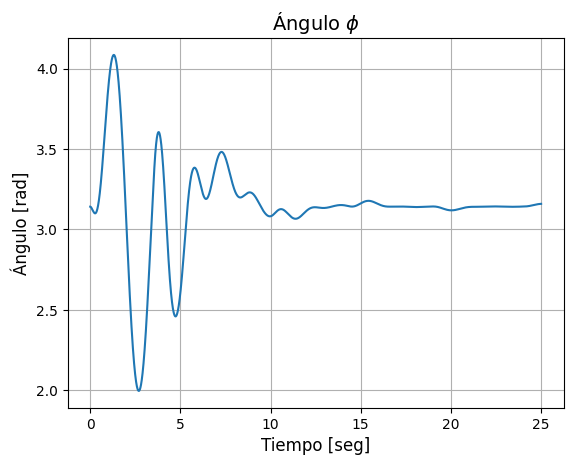

In [184]:
import matplotlib.pyplot as plt

plt.plot(t, phi[:len(t)], linewidth=1.5, label="Ángulo $\phi$")

plt.grid(True)
plt.title('Ángulo $\phi$', fontsize=14)
plt.xlabel('Tiempo [seg]', fontsize=12)
plt.ylabel('Ángulo [rad]', fontsize=12)

plt.show()

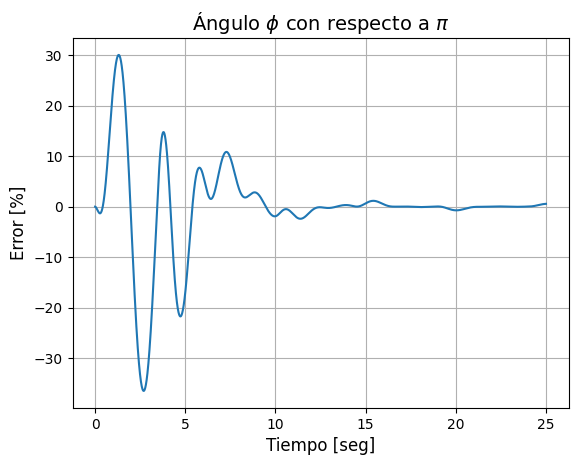

In [185]:
plt.plot(t, (np.array(phi[:len(t)]) / np.pi) * 100 - 100, linewidth=1.5, label="Error relativo respecto a $\pi$")

plt.grid(True)
plt.title('Ángulo $\phi$ con respecto a $\pi$', fontsize=14)
plt.xlabel('Tiempo [seg]', fontsize=12)
plt.ylabel('Error [%]', fontsize=12)

plt.show()

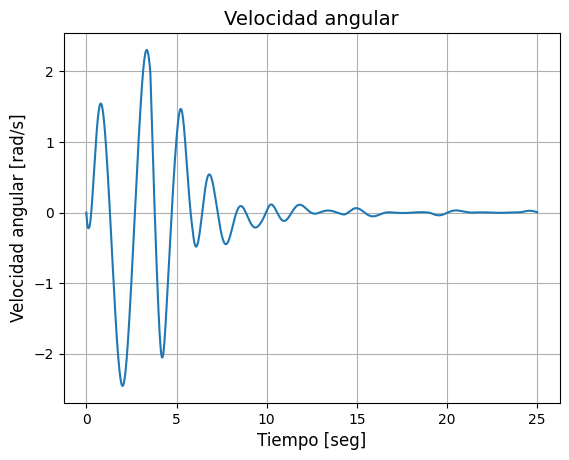

In [186]:
plt.plot(t, omega[:len(t)], linewidth=1.5, label="Velocidad angular $\omega$")

plt.grid(True)
plt.title('Velocidad angular', fontsize=14)
plt.xlabel('Tiempo [seg]', fontsize=12)
plt.ylabel('Velocidad angular [rad/s]', fontsize=12)

plt.show()

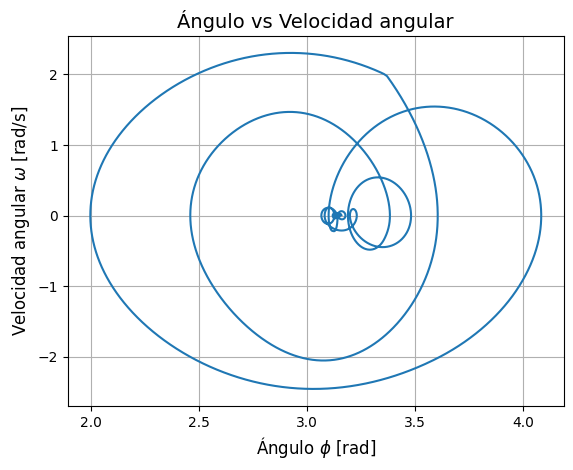

In [187]:

plt.plot(phi, omega, linewidth=1.5)

plt.title('Ángulo vs Velocidad angular', fontsize=14)
plt.xlabel('Ángulo $\phi$ [rad]', fontsize=12)
plt.ylabel('Velocidad angular $\omega$ [rad/s]', fontsize=12)
plt.grid(True)

plt.show()


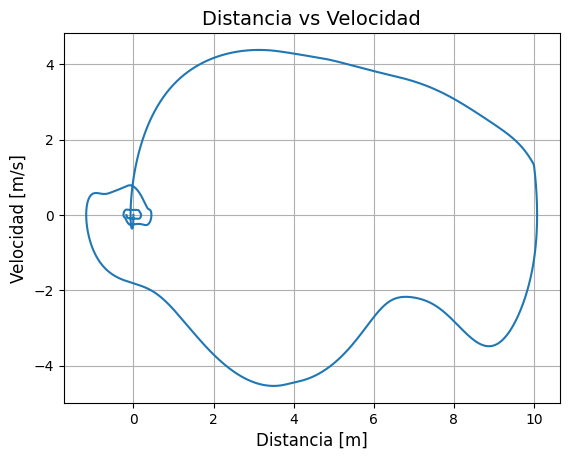

In [188]:
import matplotlib.pyplot as plt

plt.plot(delta, deltaP, linewidth=1.5)

plt.title('Distancia vs Velocidad', fontsize=14)
plt.xlabel('Distancia [m]', fontsize=12)
plt.ylabel('Velocidad [m/s]', fontsize=12)
plt.grid(True)

plt.show()


### Conculusiones

Conseguimos un actuador LQR en tiempo discreto que alcanza la referencia a los 25 segundos. Se aplico un actuador no lineal con un valor de 1 para la zona muerta.